In [2]:
import importlib,sys,local_utils
from local_utils import *

Translated from [fibonacci_FR](./fibonacci_FR.ipynb)

# Link with the Fibonacci sequence and the Lucas numbers

## Notations and definition

One may refer for instance to

- https://fr.wikipedia.org/wiki/Suite_de_Fibonacci
- https://fr.wikipedia.org/wiki/Nombre_de_Lucas

The Fibonacci numbers are the terms of the sequence $F_n$ defined by $F_0=0$, $F_1=1$, and $F_n=F_{n-1}+F_{n-2}$.

They are related to the binomial coefficients through the relation:
$$F_{n} = \binom{n-1}{0} + \binom{n-2}{1} + \cdots +$$

That is, the sum of the entries of Pascal’s triangle when following the coefficients along lines perpendicular to the main diagonal.

In [3]:
A=triangle_pascal_gauche(N=7)
print(A)

[[1 0 0 0 0 0 0]
 [1 1 0 0 0 0 0]
 [1 2 1 0 0 0 0]
 [1 3 3 1 0 0 0]
 [1 4 6 4 1 0 0]
 [1 5 10 10 5 1 0]
 [1 6 15 20 15 6 1]]


$F_1=\binom{0}{0}=1$

$F_2=\binom{1}{0}=1$

$F_3=\binom{2}{0}+\binom{1}{1}=1+1$

$F_4=\binom{3}{0}+\binom{2}{1}=1+2=3$

$F_5=\binom{4}{0}+\binom{3}{1}+\binom{2}{2}=1+3+1=5$

$\cdots$

In general, one can write that
$$F_n=\sum_{k=0}^{\infty}\binom{n-1-k}{k}$$ 

by noting that as soon as $k$ is greater than $n-1-k$, then $\binom{\,n-1-k\,}{k} = 0$.

This makes it possible to write:
- if $n(=2q+1)$ is odd, there are $q+1$ non-zero terms in the expression of $F_{2q+1}$,

$$F_{n=2q+1}=\sum_{k=0}^{q}\binom{n-1-k}{k}=\sum_{k=0}^{q}\binom{2q-k}{k}=\sum_{l=0}^{q}\binom{q+l}{q-l}$$

- if $n (= 2q)$ is even, there are $q$ non-zero terms in the expression of $F_{2q}$,

$$F_{n=2q}=\sum_{k=0}^{q-1}\binom{n-1-k}{k}=\sum_{k=0}^{q-1}\binom{2q-1-k}{k}=\sum_{l=0}^{q-1}\binom{q+l}{q-l-1}$$



The Lucas numbers are the terms of the sequence defined by $L_0=2$, $L_1=1$, and $L_n=L_{n-1} + L_{n-2}$.

They are related to the Fibonacci numbers by several identities.

We mention here only one of them, which we will use later:

$$L_n = F_{n+1} + F_{n-1}$$



## Link with the Pascal tiling

We represent the Pascal tiling for $N = 7$ to illustrate the discussion that follows.


[[2 7 16 21 16 7 2]
 [7 2 7 13 14 10 7]
 [16 7 2 7 12 14 16]
 [21 13 7 2 7 13 21]
 [16 14 12 7 2 7 16]
 [7 10 14 13 7 2 7]
 [2 7 16 21 16 7 2]]


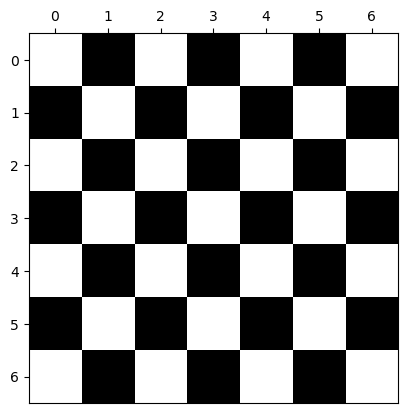

In [4]:
N=7
S=damier_pascal_S(N)
print(S)
AffichageDamierPascal(N)

For prime $N$, the Pascal tiling is regular.

The lines perpendicular to the main diagonal are defined by $i-j\not\equiv 0 \,[N]$ and $i+j = m$. Owing to symmetry, we restrict ourselves to the lower-left part of the tiling, with the additional constraint $j\leq i$.

We denote by $D_2$ the subset of pairs $(i,j)$ satisfying the previous conditions (thus depending on $N$ and on $m$, with $0 \leq m\leq 2N-2$).

We set
$$\zeta_{m} = \sum_{(i,j) \in D_2} S_{i,j}$$

By definition, $S_{i,j} = \binom{i}{j} + \binom{N-1-j}{N-1-i}.$

For $m \leq N - 1$, we observe that the first term of the sequence is exactly the definition of $F_{m+1}$.



## Property I

If $N$ is prime, then
$$L_N \equiv 1 \,[N]$$

The converse is not true.

This property of Lucas numbers is known (see the corresponding Wikipedia page for a proof).

The Pascal tiling theorem also allows one to prove it, by computing the expression of the term $\zeta_{m=N-2}$.

**Proof:**

$N$ is a prime number strictly greater than 2. Hence $N$ is odd, and so is $m=N-2$.

We write $q=(N-1)/2$ (which is indeed an integer since $N$ is odd).


$$
\begin{eqnarray}
\zeta_{N-2}&=&\sum_{(i,j)\in D_2}S_{i,j}\\
          &=&F_{m+1}+\sum_{i,j|m=N-2}\binom{N-1-j}{N-1-i}\\
\end{eqnarray}
$$

We now make the terms of the sum explicit, using $i=m-j=N-2-j$.

$$
\begin{eqnarray}
\sum_{i,j|m=N-2}\binom{N-1-j}{N-1-i}&=&\sum_{j=0}^{q-1}\binom{N-1-j}{N-1-i}\\
          &=&\sum_{j=0}^{q-1}\binom{N-1-j}{N-1-(N-2-j)}\\
          &=&\sum_{j=0}^{q-1}\binom{N-1-j}{j+1}\\
          &=&\sum_{j=0}^{q-1}\binom{2q-j}{j+1}\\
\end{eqnarray}
$$

We perform the change of variable $l=q-j$, to obtain:

$$
\begin{eqnarray}
\sum_{i,j}\binom{N-1-j}{N-1-i}&=&\sum_{l=1}^{q}\binom{2q-q+l}{q-l+1}\\
&=&\sum_{l=1}^{q}\binom{q+l}{q-l+1}\\
&=&\sum_{l=0}^{q-1}\binom{q+l+1}{q-l-1+1}\\
&=&\sum_{l=0}^{q-1}\binom{(q+1)+l}{(q+1)-l-1}\\
&=&\sum_{l=0}^{(q+1)-2}\binom{(q+1)+l}{(q+1)-l-1}\\
\end{eqnarray}
$$


With the exception of the term $l=(q+1)-1$, which is missing, we recover exactly the expression of $F_{2q+1}=F_{N+1}$.

The missing term is $\binom{2q+1}{0}=1$.



We may therefore continue the development of the expression
 $\zeta_{N-2}$ (with $m=N-2$ and $q=(N-1)/2$)

$$
\begin{eqnarray}
\zeta_{m=N-2}&=&\sum_{(i,j)\in D_2}S_{i,j}\\
          &=&F_{m+1}+\sum_{i,j|m=N-2}\binom{N-1-j}{N-1-i}\\
          &=&F_{N-1}+F_{N+1}-1\\
          &=&L_{N}-1\\
\end{eqnarray}
$$

According to the Pascal tiling theorem, all the terms $S_{i,j}$ appearing in $\zeta_{m=N-2}$ satisfy $S_{i,j}\equiv 0 \,[N]$.

Hence,
$$\zeta_{N-2}=L_N-1\equiv 0[N].$$

And we indeed obtain the desired statement:  
$\Rightarrow$ **If $N$ is prime, then $L_N \equiv 1[N]$.**


### Discussion

It is fairly clear why the converse is not true. $F_{N-1}$ and $F_{N+1}$ are sums of binomial coefficients. $F_{N+1}$ has one more term than $F_{N-1}$. The missing term is equal to 1. The Pascal tiling theorem allows us to explain that there is a term-by-term congruence modulo $N$ for the terms whose sums yield $F_{N+1}$ and $F_{N-1}$.

For those $N$ that are not prime but satisfy $L_N \equiv 1$, the property applies to the sum of several terms, but does not hold term-by-term (see the example in the *numerical verification* section).

These numbers are called Fibonacci pseudoprimes.

# Generalization

To discuss the generalization of this result, we define the sequence $G_n$ from the Fibonacci numbers and from the binomial coefficients of the last row of Pascal’s triangle $\binom{N}{\cdot}$, so that the term $G_{N-k}$ corresponds to the term $F_{N-k}$. That is, it is the partial sum of the components of the term $F_{N+k}$ that appear in the triangle/Pascal tiling restricted to the rows with indices from $0$ to $N-1$.

We have $G_{N+1} = F_{N-1}$ and $G_{N} = F_{N}$.

## Property(ies) J

One shows fairly easily that

$$
\begin{eqnarray}
G_{N-1}&=&G_{N}+G_{N+1}-\binom{N-1}{0}&=&F_{N-1}+F_{N}-\binom{N}{0}\\
G_{N-2}&=&G_{N-1}+G_{N}-\binom{N-1}{1}-\binom{N-1}{0}&=&G_{N-1}+G_{N}-\binom{N}{1}\\
G_{N-3}&=&G_{N-2}+G_{N-1}-\binom{N-1}{2}-\binom{N-1}{1}&=&G_{N-2}+G_{N-1}-\binom{N}{2}\\
\cdots&&&&\\
G_{N-k}&=&G_{N-k+1}+G_{N-k+2}-\binom{N}{k-1}\\
\end{eqnarray}
$$

By induction, one can express all the terms $G_{N-k}$ in terms of $F_{N}$ and $F_{N-1}$ and show that for $0\leq k\leq N-1$,

$$G_{N-k}=F_{k+1}F_N+F_kF_{N-1}-\sum_{j=0}^{k-1}F_{k-j}\binom{N}{j}$$

but also

$$G_{N-k}=F_{N+k}-\sum_{j=0}^{k-1}F_{k-j}\binom{N}{j}$$

using the relation $F_pF_{q+1}+F_{p-1}Fq=F_{p+q}$.

We note immediately that if $N$ is prime, then all the binomial terms appearing in the sum are $\equiv 0 \,[N]$ except for $\binom{N}{0} = 1$.


We return to the expression of $\zeta_m$.

One easily shows that for $0 \leq m \leq N - 2$

$$\zeta_m=F_{m+1}+G_{m+1}$$

For $m=N-2$, we indeed recover

$$
\begin{eqnarray}
\zeta_{m=N-2}&=&F_{N-1}+G_{N-1}\\
&=&F_{N-1}+F_{N+1}-F_1\binom{N}{0}\\
&=& L_N-1\\
\end{eqnarray}
$$

That is, the expression used to prove Property I, by applying the Pascal tiling theorem for $m=N-2$.



We may then generalize to each line perpendicular to the diagonal of the Pascal tiling, that is, for odd prime $N$ and $m=N-2, N-4,\cdots, 1$.

For $N\ge5$, we obtain for $m=N-4$


$$
\begin{eqnarray}
\zeta_{N-4}&=&F_{N-3}+G_{N-3}\\
&=&F_{N-3}+F_{N+3}-\sum_{j=0}^2F_{3-j}\binom{N}{j}\\
&=&F_{N-3}+F_{N+3}-F_3\binom{N}{0}-F_2\binom{N}{1}-F_1\binom{N}{2}\\
\end{eqnarray}
$$

We then use the following relation

$$F_{N+k}+(-1)^{k+1}F_{N-k}=F_kL_N$$

We may note that since we are studying only every other line, the term $(-1)^{k+1}$ will always be equal to 1.

**Warning: from this point on, some results therefore depend on the fact that $k$ is odd, but are not necessarily dependent on whether $N-k$ is odd or not.**

And we obtain

$$
\begin{eqnarray}
\zeta_{N-4}&=&F_3L_N-F_3\binom{N}{0}-F_2\binom{N}{1}-F_1\binom{N}{2}\\
&=&F_3L_N-2-N-N(N-1)/2\\
\end{eqnarray}
$$

and finally, by applying the fact that term by term the $S_{i,j}$ of this line are congruent to $0[N]$,

$$\zeta_{N-4}\equiv F_3(L_N-1)[N]\equiv 0[N]$$

This equality is always satisfied, since $L_N-1\equiv 0[N]$ according to the previous proof for $\zeta_{N-2}$.

This expression generalizes for odd prime $N$, and for $m=N-2, N-4, \cdots, 1$.

$$
\begin{eqnarray}
\zeta_{N-2q}&=&F_{2q-1}L_N-\sum_{j=0}^{2q-2}F_{2q-1-j}\binom{N}{j}\\
&=&F_{2q-1}\left(L_N-1\right)-\sum_{j=1}^{2q-2}F_{2q-1-j}\binom{N}{j}\\
&\equiv&F_{2q-1}\left(L_N-1\right)[N]\\
\end{eqnarray}
$$



To conclude, we show here that for odd prime $N$, 

$$
\begin{eqnarray}
\sum_{q=1}^{(N-1)/2}\zeta_{N-2q}&\equiv&\left(\left(L_N-1\right)\sum_{q=1}^{(N-1)/2}F_{2q-1}\right)[N]\\
&\equiv&\left(L_N-1\right)F_{N-1}[N]\\
\end{eqnarray}
$$

where we have used the property $\sum_{i=0}^nF_{2i-1}=F_{2n}$ (property 11 in https://fr.wikipedia.org/wiki/Suite_de_Fibonacci#Propri%C3%A9t%C3%A9s_de_la_suite_de_Fibonacci)

**Warning: this property depends on $N$ being prime, since we have removed the terms for which $\binom{N}{j}\equiv 0[N]$.**


If we now take the sum over all $i,j$ such that $0\leq i \leq N-1$, $0\leq j \leq N-1$ and $j\not\equiv i[2]$

that is, over all the black cells of the Pascal tiling, we have a double symmetry, and we obtain

$$\sum_{i,j|j\not\equiv i[2]}S_{i,j}=4\sum_{q=1}^{(N-1)/2}\zeta_{N-2q}\equiv 4(L_N-1)F_{N-1}[N] $$

### Discussion / Even and odd $N$

The expression $\zeta_m$ is not restricted to even or odd $m$. One can therefore compute the sum over the entire Pascal tiling, but one must pay attention to symmetries and to the fact that the diagonals should not be counted multiple times.

- for odd values of $m$, one must count $\zeta_m$ twice,
- for even values of $m$, one must count $\zeta_m$ twice but subtract 1 in order to count the diagonal terms $S_{i,i}$ only once,
- the $m$ between $0$ and $N-2$ must be counted twice,
- $m=N-1$ must be counted once (whether it is even or odd).

We may use the expression $\zeta_m$ line by line whether $N$ is prime or not.

$$\zeta_{N-k}=F_{N-(k-1)}+F_{N+k-1}-\sum_{j=0}^{k-2}F_{k-1-j}\binom{N}{j}$$

See the following sections for a reminder of the various expressions of $\zeta_{m=N-k}$.

### Discussion / Sums of the $S_{i,j}$

We know the sum of all the rows of Pascal’s triangle, and we show that for any $N$, the sum of the terms of the tiling is given by

$$T_N=\sum_{m=0}^{N-1}\zeta_m=2(2^N-1)$$

that is, simply twice the sum of the first $N$ rows of Pascal’s

Then, with the previous constraints, in order to remove the earlier redundancies on the diagonal, we obtain for the sum of all the terms of the tiling

$$\sum_{i,j}S_{i,j}=2(T_N-N)=2\left(2^{N+1}-N-2\right)$$


## Pascal tiling and $L_N\equiv 1[N]$

One may note that the sum over all the black cells of the tiling does not allow one to prove that if $N$ is an odd prime then $L_N\equiv 1[N]$ (Property I above).

Indeed, except for $N=5$, for which $F_5=5\equiv 0[N]$, prime $N$ implies  
- $F_{N-1}\equiv 0[N]$ and $F_{N+1}\equiv 1[N]$ if $N\equiv 1[5]$ or $N\equiv 4[5]$,  
- $F_{N-1}\equiv 1[N]$ and $F_{N+1}\equiv 0[N]$ if $N\equiv 2[5]$ or $N\equiv 3[5]$.

The sum over all the terms of the tiling allows one to prove Property I only for certain prime numbers (more precisely, it proves it only for a subset of odd $N$).

However, the sum over the largest perpendicular ($\zeta_{N-2}$), for all odd prime $N$, does allow one to prove this relation.


###  $L_N\equiv 1[N]$ and prime $N$

The Pascal tiling theorem induces a strong term-by-term relation within Pascal’s triangle. The proof of the Pascal tiling theorem relies mainly on the fact that if $N$ is prime then $\binom{N}{j}\equiv 0[N]$ except for $j=0$ and $j=N$.

This property also explains the fractal structure of Pascal’s triangle modulo $N$ (prime) for the rows with indices greater than $N$.


In [5]:
N=5
print("N=",N)
print()
A=triangle_pascal_gauche(3*N)
AmodN=A%N
print("Triangle 2N")
for i in range(2*N):
    for j in range(2*N):
        if j<=i:
            print(AmodN[i,j],end=" ")
    print(end="\n")
print()
print("Triangle 3N")
AmodN=A%N
for i in range(3*N):
    for j in range(3*N):
        if j<=i:
            print(AmodN[i,j],end=" ")
    print(end="\n")

N= 5

Triangle 2N
1 
1 1 
1 2 1 
1 3 3 1 
1 4 1 4 1 
1 0 0 0 0 1 
1 1 0 0 0 1 1 
1 2 1 0 0 1 2 1 
1 3 3 1 0 1 3 3 1 
1 4 1 4 1 1 4 1 4 1 

Triangle 3N
1 
1 1 
1 2 1 
1 3 3 1 
1 4 1 4 1 
1 0 0 0 0 1 
1 1 0 0 0 1 1 
1 2 1 0 0 1 2 1 
1 3 3 1 0 1 3 3 1 
1 4 1 4 1 1 4 1 4 1 
1 0 0 0 0 2 0 0 0 0 1 
1 1 0 0 0 2 2 0 0 0 1 1 
1 2 1 0 0 2 4 2 0 0 1 2 1 
1 3 3 1 0 2 1 1 2 0 1 3 3 1 
1 4 1 4 1 2 3 2 3 2 1 4 1 4 1 


On this topic, one may consult for instance the reference “DES DÉCOUVERTES DANS LE TRIANGLE DE PASCAL”, Gregor BERG, https://mathinfo.unistra.fr/websites/math-info/irem/Publications/L_Ouvert/o_71_9-22.pdf (in french).

The $(N-1)\times(N-1)$ triangle consisting solely of 0’s is the direct consequence of the row of $N-1$ coefficients congruent to $0[N]$ appearing in the row of index $N$ when $N$ is prime (recall that this is the $(N+1)$-st row).

That the row of $\binom{N}{i}$ *“structures”* the subsequent rows of Pascal’s triangle is not surprising, given the recurrence formula relating the coefficients $\binom{i}{j}$ to the $\binom{i-1}{j}$.

The Pascal tiling theorem shows that the primality of $N$ also structures the nonzero entries, far beyond the usual properties stating for instance that $\binom{i}{j}\not\equiv 0[N]$ for all $0\leq i \leq N-1$ and $j\leq i$, by imposing
$$\binom{i}{j}\equiv -\binom{N-1-j}{N-1-i}[N]~~~\text{for all}~i,j~~~|~~~0\leq i \leq N-1,~j\leq i~{\rm et}~j\not\equiv i[2]$$



### Discussion / $L_N\not\equiv 1[N]$ ($N=2p$ with $p$ prime)

This is one of the known special cases in which $N$ is even and cannot be a Fibonacci pseudoprime (Somer, 1990), for which a specific proof shows that it is not possible to have $L_{2p}\equiv 1[2p]$ (Porto, 1993).

The Pascal tiling provides a rather simple explanation (proof)



In [7]:
p=7
N=2*p
A=damier_pascal_A(N)
B=damier_pascal_B(N)
S=A+B
W=A-B

Nmod=p

print("A%p (modulo centré)")
Affiche(A%Nmod,Nmod=Nmod,Fneg=True)

print("B%p (modulo centré)")
Affiche(B%Nmod,Nmod=Nmod,Fneg=True)

A%p (modulo centré)
i= 0 |   1 
i= 1 |   1   1 
i= 2 |   1   2   1 
i= 3 |   1   3   3   1 
i= 4 |   1  -3  -1  -3   1 
i= 5 |   1  -2   3   3  -2   1 
i= 6 |   1  -1   1  -1   1  -1   1 
i= 7 |   1   0   0   0   0   0   0   1 
i= 8 |   1   1   0   0   0   0   0   1   1 
i= 9 |   1   2   1   0   0   0   0   1   2   1 
i=10 |   1   3   3   1   0   0   0   1   3   3   1 
i=11 |   1  -3  -1  -3   1   0   0   1  -3  -1  -3   1 
i=12 |   1  -2   3   3  -2   1   0   1  -2   3   3  -2   1 
i=13 |   1  -1   1  -1   1  -1   1   1  -1   1  -1   1  -1   1 

B%p (modulo centré)
i= 0 |   1 
i= 1 |  -1   1 
i= 2 |   1  -2   1 
i= 3 |  -1   3  -3   1 
i= 4 |   1   3  -1   3   1 
i= 5 |  -1  -2  -3   3   2   1 
i= 6 |   1   1   1   1   1   1   1 
i= 7 |   1   0   0   0   0   0   0   1 
i= 8 |  -1   1   0   0   0   0   0  -1   1 
i= 9 |   1  -2   1   0   0   0   0   1  -2   1 
i=10 |  -1   3  -3   1   0   0   0  -1   3  -3   1 
i=11 |   1   3  -1   3   1   0   0   1   3  -1   3   1 
i=12 |  -1  -2  -3 

We indeed recover the self-similar structure, and the existence of the triangle of $0~[p]$ (see Berg, 1993).

We observe that the symmetry between $A$ and $B$ produces the same triangle in the tiling for all the cells of $S$ or $W$ concerned modulo $p$ (and not modulo $N=2p$).


In [8]:
print("S%p (modulo centré)")
Affiche(S%Nmod,Nmod=Nmod,Fneg=True)

S%p (modulo centré)
i= 0 |   2 
i= 1 |   0   2 
i= 2 |   2   0   2 
i= 3 |   0  -1   0   2 
i= 4 |   2   0  -2   0   2 
i= 5 |   0   3   0  -1   0   2 
i= 6 |   2   0   2   0   2   0   2 
i= 7 |   2   0   0   0   0   0   0   2 
i= 8 |   0   2   0   0   0   0   0   0   2 
i= 9 |   2   0   2   0   0   0   0   2   0   2 
i=10 |   0  -1   0   2   0   0   0   0  -1   0   2 
i=11 |   2   0  -2   0   2   0   0   2   0  -2   0   2 
i=12 |   0   3   0  -1   0   2   0   0   3   0  -1   0   2 
i=13 |   2   0   2   0   2   0   2   2   0   2   0   2   0   2 



In [9]:
print("W%p (modulo centré)")
Affiche(W%Nmod,Nmod=Nmod,Fneg=True)

W%p (modulo centré)
i= 0 |   0 
i= 1 |   2   0 
i= 2 |   0  -3   0 
i= 3 |   2   0  -1   0 
i= 4 |   0   1   0   1   0 
i= 5 |   2   0  -1   0   3   0 
i= 6 |   0  -2   0  -2   0  -2   0 
i= 7 |   0   0   0   0   0   0   0   0 
i= 8 |   2   0   0   0   0   0   0   2   0 
i= 9 |   0  -3   0   0   0   0   0   0  -3   0 
i=10 |   2   0  -1   0   0   0   0   2   0  -1   0 
i=11 |   0   1   0   1   0   0   0   0   1   0   1   0 
i=12 |   2   0  -1   0   3   0   0   2   0  -1   0   3   0 
i=13 |   0  -2   0  -2   0  -2   0   0  -2   0  -2   0  -2   0 



The self-similar structure produces an alternation of 0 and 2 in the first column modulo $p$, in the tiling with $N=2p$.

But the tiling is not regular (as expected), since $N$ is not prime.

However, we may note that $\zeta_{m=N-2}\equiv 2~[p]$, because all the terms are zero except the one on the diagonal (proved later).

For readability, we represent only the cells of $S~[p]$ and $W~[p]$ for which $i+j$ is even, then odd.


In [10]:
print(f'N={N}=2p=2x{p}')
print("S%p (centered modulo)")
Affiche(S%Nmod, Nmod=Nmod, Fneg=True, Fij="even")
print("S%p (centered modulo)")
Affiche(S%Nmod, Nmod=Nmod, Fneg=True, Fij="odd")
print("-"*40)
print("W%p (centered modulo)")
Affiche(W%Nmod, Nmod=Nmod, Fneg=True, Fij="even")
print("W%p (centered modulo)")
Affiche(W%Nmod, Nmod=Nmod, Fneg=True, Fij="odd")
print("-"*40)
print("S%p (centered modulo) i+j=N-2")
Affiche(S%Nmod, Nmod=Nmod, Fneg=True, Fij=N-2)

N=14=2p=2x7
S%p (centered modulo)
Fij= even
i= 0 |   . 
i= 1 |   .   . 
i= 2 |   .   .   . 
i= 3 |   .   .   .   . 
i= 4 |   .   .   .   .   . 
i= 5 |   .   .   .   .   .   . 
i= 6 |   .   .   .   .   .   .   . 
i= 7 |   .   .   .   .   .   .   .   . 
i= 8 |   .   .   .   .   .   .   .   .   . 
i= 9 |   .   .   .   .   .   .   .   .   .   . 
i=10 |   .   .   .   .   .   .   .   .   .   .   . 
i=11 |   .   .   .   .   .   .   .   .   .   .   .   . 
i=12 |   .   .   .   .   .   .   .   .   .   .   .   .   . 
i=13 |   .   .   .   .   .   .   .   .   .   .   .   .   .   . 

S%p (centered modulo)
Fij= odd
i= 0 |   . 
i= 1 |   .   . 
i= 2 |   .   .   . 
i= 3 |   .   .   .   . 
i= 4 |   .   .   .   .   . 
i= 5 |   .   .   .   .   .   . 
i= 6 |   .   .   .   .   .   .   . 
i= 7 |   .   .   .   .   .   .   .   . 
i= 8 |   .   .   .   .   .   .   .   .   . 
i= 9 |   .   .   .   .   .   .   .   .   .   . 
i=10 |   .   .   .   .   .   .   .   .   .   .   . 
i=11 |   .   .   .   .   .   .   .   .  

At the edges ($j=0$), for $N=2p$ with $p$ prime:
- $i\equiv 0~[2]$ ($i$ *even*),
    - $S_{i,0}\equiv 2~[p]$ and $W_{i,0}\equiv 0~[p]$ if $i\leq p-1$
    - $S_{i,0}\equiv 0~[p]$ and $W_{i,0}\equiv 2~[p]$ if $i>p-1$
- $i\not\equiv 0~[2]$ ($i$ *odd*),
   - $S_{i,0}\equiv 0~[p]$ and $W_{i,0}\equiv 2~[p]$ if $i\leq p-1$
   - $S_{i,0}\equiv 2~[p]$ and $W_{i,0}\equiv 0~[p]$ if $i>p-1$


We focus on the values of $S_{i,j}$ appearing in the sum $\zeta_{m=i+j=N-2}=L_N-1$.

With the exception of $S_{p-1,p-1}=2$, half of the remaining cells lie in the triangle of 0’s.

For the others, recall that for $3\leq i < N-1$, $1\leq j \leq i-2$, and $q=i-j\ge 2$.

$$
\begin{eqnarray}
S_{i,j}&=&S_{i-1,j-1}+\sum_{k=0}^{j-1}S_{i-2-k,j-k}+A_{q-1,0}-B_{q-1,0}\\
&=&S_{i-1,j-1}+\sum_{k=0}^{j-1}S_{i-2-k,j-k}+W_{q-1,0}
\end{eqnarray}
$$

For the other cells (those located below), the term $W_{q-1,0}$ is zero ($i-j=q-1$ is odd) and the other terms of $S$ are located above and to the left, and are therefore congruent to $0~[p]$.

Then $\zeta_{m=N-2}\equiv 2[p]$ and $L_{2p}-1\equiv 2[p]$.

In [19]:
# illustration of the terms involved in the computation of the various entries that are not in the triangle of zero terms.
p=7
N=2*p
m=N-2
S=damier_pascal_S(N)
for j in range(1,p-p//2-1):
    i=m-j
    print(f'S(i={i:2},j={j:2})%p=',S[i,j]%p, end=" | ")
    DisplaySijRecurrence(i,j,N)

S(i=11,j= 1)%p= 0 | S(11,1)=S(10,0)+S(9,1)+W(9,0)
S(i=10,j= 2)%p= 0 | S(10,2)=S(9,1)+S(8,2)+S(7,1)+W(7,0)


But what interests us here is the value of $L_{2p}-1$ modulo $2p$ and not modulo $p$.

In [21]:
Nmod=N
print("S%(N=2p) (centered modulo)")
Affiche(S%Nmod,Nmod=Nmod,Fneg=True,Fij="pair")

S%(N=2p) (centered modulo)
Fij= pair
i= 0 |   2 
i= 1 |   .   2 
i= 2 |  -5   .   2 
i= 3 |   .  -1   .   2 
i= 4 |   2   .   5   .   2 
i= 5 |   .  -4   .  -1   .   2 
i= 6 |  -5   .  -5   .  -5   .   2 
i= 7 |   .  -7   .  -7   .  -7   .   2 
i= 8 |   0   .   0   .   0   .  -7   .   2 
i= 9 |   .   0   .   0   .   0   .  -5   .   2 
i=10 |  -7   .   0   .   0   .  -7   .  -1   .   2 
i=11 |   .  -7   .   0   .   0   .  -5   .   5   .   2 
i=12 |   0   .  -7   .   0   .  -7   .  -4   .  -1   .   2 
i=13 |   .   0   .  -7   .   0   .  -5   .   2   .  -5   .   2 



We restrict ourselves to the line of interest, modulo $p$, then modulo $2p$.


In [22]:

print("N=2p=",N)
print()
m=N-2
Nmod=p
print("S m=N-2=",m,"modulo p=",p)
for j in range(N//2):
    i=m-j
    print(f'{centered_mod(S[i,j],Nmod):3} ',end=" ")
print()
print()
Nmod=N
print("S m=N-2=",m,"modulo N=",N)
for j in range(N//2):
    i=m-j
    print(f'{centered_mod(S[i,j],Nmod):3} ',end=" ")
print()


N=2p= 14

S m=N-2= 12 modulo p= 7
  0    0    0    0    0    0    2  

S m=N-2= 12 modulo N= 14
  0   -7    0    0    0   -7    2  


All the terms congruent to $0[p]$ are congruent to $0[2p]$ or $-p[2p]$ (centered modulo), except for the last one, which is unchanged since $2<p$.


Their sum as well, and we obtain only two possible cases:
$$L_{2p}-1\equiv 2[2p]~~~\text{or}~~~L_{2p}-1\equiv -p+2[2p]$$

that is,

$$L_{2p}\equiv 3[2p]~~~\text{or}~~~L_{2p}\equiv -p+3[2p]$$

And we may conclude that **there is no $N=2p$ with $p\ge 3$ prime such that $L_{N}\equiv 1$.**

**Commentary**: As mentioned earlier, this result is known (Somer, 1990, Theorem 4).

Its proof follows from the property $L_{2n}=L_n^2+2(-1)^{n-1}$, which for $n=p$ an odd prime gives:

$L_{2p}=L_p^2+2\equiv 3[p]$

This result generalizes to $N=2p^\alpha$ (Somer, 1990).

The proof obtained from the Pascal tiling theorem is different because, as in the proof that $L_p\equiv 1[p]$ when $p$ is prime, it starts from a relation that holds term by term in order to conclude about the property of the sum $L_N$.


### Fibonacci pseudo-primes

These are the composite integers satisfying $L_N\equiv 1[N]$.

The first one is $N=705$.

There is no reason why, as in the prime case, all the $\zeta_{m=N-2q}$ should be congruent to $0[N]$, since the factorization obtained in that case relies on the property $\binom{N}{k}\equiv 0[N]$.

Nevertheless, from the previous computations, **for all $N$**
- $\zeta_0\equiv 2[N]$ puisque $\zeta_0=S_{0,0}=2$
- $\zeta_1\equiv 0[N]$ puisque $\zeta_1=S_{1,0}=N$
- $\zeta_2=S_{2,0}+S_{1,1}=3+(N-1)(N-2)/2=F_3+G_3=2-G_2+G_1+\binom{N}{N-2}=2-(N-1)+1+\binom{N}{N-2}$
- $\zeta_{N-1}=2F_N$
- $\zeta_{N-2}=F_{N-1}+F_{N+1}-\binom{N}{0}=L_N-1$
- $\zeta_{N-3}=F_{N-2}+F_{N+2}-F_2-F_1N=F_2L_N+2F_{N-2}-N-1=L_N+2F_{N-2}-N-1$
- $\zeta_{N-4}=2L_N-2-N-N(N-1)/2=2(L_N-1)-N(2+N-1)/2=2\zeta_{N-2}-N(N+1)/2$

From these expressions, we deduce for example that if $N$ is an **odd** Fibonacci pseudoprime, then $\zeta_{N-2}\equiv 0[N]$ by Property I, but we also have $\zeta_{N-4}\equiv 0[N]$ because $\zeta_{N-4}=2\zeta_{N-2}-N(N+1)/2$, and since $N$ is odd this implies $(N+1)/2$ is an integer, and therefore $\zeta_{N-4}[N]\equiv\zeta_{N-2}\equiv 0[N]$.

Moreover, even if for such numbers the sum of the relevant $S_{i,j}$ is congruent to 0 modulo $N$, one can show that at least one of these terms is nonzero (Property L).

Similarly, one can show that if $q$ is a prime number dividing $N = Kq$, then $S_{i,j : i+j = N-2} \equiv 0$ whenever $j+1 \not\equiv 0 [q]$. This implies, for instance, that $\zeta_{m = N-2} = L_N - 1$ may be computed modulo $q$ by restricting the sum to the terms such that $j+1 \equiv 0 [q]$. We then recover the well-known property for prime $q$, yielding the congruence $L_{Kq} - 1 \equiv L_K-1[q]$.


## Property K : $\zeta_m$

We recall here the various expressions of the function $\zeta_{N-k}$, with $1\leq k\leq N$

$$
\begin{eqnarray}
\zeta_{N-k}&=&F_{N-(k-1)}+G_{N-(k-1)}\\
&=&F_{N-(k-1)}+F_{N+(k-1)}-\sum_{j=0}^{k-2}\binom{N+k-2-j}{j}\\
&=&F_{N-(k-1)}+F_{N+(k-1)}-\sum_{j=0}^{k-2}F_{k-1-j}\binom{N}{j}
\end{eqnarray}
$$

The sequence of terms $G_m$ can be written as a sequence of increasing indices, given for $2<m\leq N$ by

$$G_m=-G_{m-1}+G_{m-2}+\binom{N}{N+1-m}$$

with $G_1=1$ and $G_2=N-1$.

If we sum the $\zeta_{N-k}$ for $1\leq k\leq N$, we recover the properties linking Fibonacci numbers and Lucas numbers, and more specifically the relation $F_{N+K}+(-1)^{K+1}F_{N-K}=F_KL_N$, for $K=N-1$.

$$F_{2N-1}+(-1)^{N}=F_{N-1}L_N$$



We may verify, for example, that the following sum is indeed equal to the sum of the coefficients of the first $N$ rows of Pascal’s triangle (from index 0 to $N-1$):


$$
\begin{eqnarray}
T_N&=&F_N+\sum_{m=0}^{N-2}\zeta_{m}\\
&=&F_N+\sum_{m=1}^{N-1}F_{m}+G_{m}\\
&=&F_N+F_{N+1}-1+\sum_{m=1}^{N-1}G_{m}\\
&=&F_N+F_{N+1}-1+G_1+G_2+\sum_{m=3}^{N-1}-G_{m-1}+G_{m-2}+\binom{N}{N+1-m}\\
&=&F_N+F_{N+1}-1+2G_1+G_2-G_{N-2}+\sum_{m=3}^{N-1}\binom{N}{N+1-m}\\
&=&F_N+F_{N+1}-1+2G_1+G_2-G_{N-2}+\binom{N}{2}+\cdots+\binom{N}{N-2}\\
&=&F_N+F_{N+1}-1+2G_1+G_2-G_{N-2}+2^N-\binom{N}{0}-\binom{N}{1}-\binom{N}{N-1}-\binom{N}{N}\\
&=&F_N+F_{N+1}-1+2G_1+G_2-G_{N-2}+2^N-1-N-N-1\\
&=&F_N+F_{N+1}-1+2+N-1-G_{N-2}+2^N-2-2N\\
&=&F_N+F_{N+1}-2-G_{N-2}+2^N-N\\
&=&F_N+F_{N+1}-2-\left(G_{N-1}+G_{N}-\binom{N}{1}\right)+2^N-N\\
&=&F_N+F_{N+1}-2-\left(F_{N-1}+F_N-\binom{N}{0}+F_{N}-\binom{N}{1}\right)+2^N-N\\
&=&F_N+F_{N+1}-2-\left(F_{N-1}+F_N-1+F_{N}-N\right)+2^N-N\\
&=&F_N+F_{N+1}-1-F_{N-1}-2F_N+N+2^N-N\\
&=&F_{N+1}-1-F_{N-1}-F_N+2^N\\
&=&2^N-1\end{eqnarray}
$$

We also show, from the property on $G_m$, that for $2\leq m \leq N-1$

$$
\begin{eqnarray}
\zeta_m&=&-\zeta_{m-1}+\zeta_{m-2}+2F_m+\binom{N}{N-m}\\
&=&-\zeta_{m-1}+\zeta_{m-2}+2F_m+\binom{N}{m}\\
\end{eqnarray}
$$
with $\zeta_0=2$ and $\zeta_1=N$.

In the same way, we show that for $1\leq k \leq N-2$
$$
\begin{eqnarray}
\zeta_{N-k-2}&=&\zeta_{N-k-1}+\zeta_{N-k}-2F_{N-k}-\binom{N}{k}
\end{eqnarray}
$$
with $\zeta_{N-1}=2F_N$ and $\zeta_{N-2}=L_N-1$.

We may note that if we add $\zeta_m$ and $\zeta_{N-m-2}$, the binomial coefficients cancel out.

If we set $N=2q$ ($N$ even), this makes $L_q$ appear.

$$\zeta_m+\zeta_{N-m-2}=-\zeta_{m-1}+\zeta_{m-2}+\zeta_{N-m-1}+\zeta_{N-m}+2\left(\left(1+(-1)^{q-m+1}\right)F_m-F_{q-m}L_q\right)$$

**Note: this last expression is valid only for $N=2q$** because of the transformation used to make $L_q$ appear (but one may write the equivalent formula for $N=2q+1$ if needed).


## Property M : Mirror of the Pascal tiling

The previous discussions show the importance of the alternating term $(-1)^{k+1}$ in the study of the properties of $\zeta_m$.

One can in fact shift this sign by one rank by modifying the definition of the Pascal tiling, by replacing the sum of the two binomial coefficients with their difference. We then define $W_{i,j}$, still for $j\leq i$, by

$$W_{i,j}=\binom{i}{j}-\binom{N-1-j}{N-1-i}$$

**Note** One may observe that the term $W_{i,j}$ appears in the recurrence formula used to prove the Pascal tiling theorem.

We then see that the mirror of the Pascal tiling constructed from $W_{i,j}$ instead of $S_{i,j}$ is still regular if and only if $N$ is prime, but the black and white cells are reversed (hence the title *Mirror of the Pascal tiling*).


In [23]:
N=7
Nmod=N
S=damier_pascal_A(N)+damier_pascal_B(N)
W=damier_pascal_A(N)-damier_pascal_B(N)
print("Pascal tiling : S%N for N=",N)
Affiche(S%Nmod)
print("Mirror of the Pascal tiling : W%N for N=",N)
Affiche(W%Nmod)

Pascal tiling : S%N for N= 7
i= 0 |  2 
i= 1 |  0  2 
i= 2 |  2  0  2 
i= 3 |  0  6  0  2 
i= 4 |  2  0  5  0  2 
i= 5 |  0  3  0  6  0  2 
i= 6 |  2  0  2  0  2  0  2 

Mirror of the Pascal tiling : W%N for N= 7
i= 0 |  0 
i= 1 |  2  0 
i= 2 |  0  4  0 
i= 3 |  2  0  6  0 
i= 4 |  0  1  0  1  0 
i= 5 |  2  0  6  0  3  0 
i= 6 |  0  5  0  5  0  5  0 




We may then define the function $\gamma_m$, which is to $W_{i,j}$ what $\zeta_m$ is to $S_{i,j}$.

$$\gamma_m=F_{m+1}-G_{m+1}$$

with the same definitions and constraints as before for the sequences $F$ and $G$.

We check that the Mirror property of the Pascal tiling makes it possible to recover $L_N\equiv 1[N]$ for odd prime $N$.


$$\begin{eqnarray}
\gamma_{N-1}&=&F_N-G_N\\
&=&F_N-F_N\\
&=&0~~~\text{(for all N)}\\
\\
\gamma_{N-2}&=&F_{N-1}-G_{N-1}=F_{N-1}-F_{N+1}+1=0\\
&=&2F_{N-1}-(L_N-1~)~~\text{(for all N)}\\
&\equiv&2F_{N-1}[N]~~\text{(for prime N)}\\
\\
\gamma_{N-3}&=&F_{N-2}-G_{N-2}=F_{N-2}-F_{N+2}+N+1\\
&=&-L_N+N+1\\
&=&-(L_N-1)+N\\
&\equiv&0[N]~~~\text{(for odd prime N)}\\
\\
\gamma_{N-4}&=&F_{N-3}-F_{N+3}+F_3+F_2N+F_1N(N-1)/2\\
&=&F_{N-3}-(F_3L_N-F_{N-3})+F_3+F_2N+F_1N(N-1)/2\\
&=&2F_{N-3}-F_3L_N+F_3+F_2N+F_1N(N-1)/2\\
&=&2F_{N-3}-2L_N+2+N+N(N-1)/2\\
&=&2F_{N-3}-2(L_N-1)+N+N(N-1)/2~~~\text{(for all N)}\\
&\equiv&2F_{N-3}[N]~~~\text{(for all odd prime N)}\\
\end{eqnarray}
$$


# Numerical Verification

## Fibonacci number

In [13]:
# nombres de Fibonacci
for N in range(0,10):
    print("N",N,"Fn",Fibo(N))

N 0 Fn 0
N 1 Fn 1
N 2 Fn 1
N 3 Fn 2
N 4 Fn 3
N 5 Fn 5
N 6 Fn 8
N 7 Fn 13
N 8 Fn 21
N 9 Fn 34


## Lucas number

In [14]:
# nombres de Lucas
for N in range(0,10):
    print("N",N,"Ln",Lucas(N))

N 0 Ln 2
N 1 Ln 1
N 2 Ln 3
N 3 Ln 4
N 4 Ln 7
N 5 Ln 11
N 6 Ln 18
N 7 Ln 29
N 8 Ln 47
N 9 Ln 76


## sequence Gn

In [8]:
import importlib,sys,local_utils
from local_utils import *

for N in range(2,8):
    A=triangle_pascal_gauche(N)
    #for n in range(N,-1,-1):
    for n in range(0,N): # 0 à N-1
        k=N-n
        Gn=G(n,N)
        Gnbis=G(n+2,N)+G(n+1,N)-binomial(N,k-1)
        if Gn==Gnbis:
            pass
            print("N",N,"n",n,"k",k,"Fn=",Fibo(n),"Gn=",Gn,"Gn-2+Gn-1-binom(N,k-1)",Gnbis)
        else:
            print("ERROR")
            print("N",N,"n",n,"k",k,"Fn=",Fibo(n),"Gn=",Gn,"Gn-2+Gn-1-binom(N,k-1)",Gnbis)
            break
    # test si N est premier
    if isprime(N):
        print("N is prime",N,"Fibo(N-1)",Fibo(N-1),"G(N-1,N)",G(N-1,N))
        print("L(N)-1[N]=zeta((Fibo(N-1)+G(N-1,N))%N=",(Fibo(N-1)+G(N-1,N))%N)
    print()

N 2 n 0 k 2 Fn= 0 Gn= 0 Gn-2+Gn-1-binom(N,k-1) 0
N 2 n 1 k 1 Fn= 1 Gn= 1 Gn-2+Gn-1-binom(N,k-1) 1
N is prime 2 Fibo(N-1) 1 G(N-1,N) 1
L(N)-1[N]=zeta((Fibo(N-1)+G(N-1,N))%N= 0

N 3 n 0 k 3 Fn= 0 Gn= 0 Gn-2+Gn-1-binom(N,k-1) 0
N 3 n 1 k 2 Fn= 1 Gn= 1 Gn-2+Gn-1-binom(N,k-1) 1
N 3 n 2 k 1 Fn= 1 Gn= 2 Gn-2+Gn-1-binom(N,k-1) 2
N is prime 3 Fibo(N-1) 1 G(N-1,N) 2
L(N)-1[N]=zeta((Fibo(N-1)+G(N-1,N))%N= 0

N 4 n 0 k 4 Fn= 0 Gn= 0 Gn-2+Gn-1-binom(N,k-1) 0
N 4 n 1 k 3 Fn= 1 Gn= 1 Gn-2+Gn-1-binom(N,k-1) 1
N 4 n 2 k 2 Fn= 1 Gn= 3 Gn-2+Gn-1-binom(N,k-1) 3
N 4 n 3 k 1 Fn= 2 Gn= 4 Gn-2+Gn-1-binom(N,k-1) 4

N 5 n 0 k 5 Fn= 0 Gn= 0 Gn-2+Gn-1-binom(N,k-1) 0
N 5 n 1 k 4 Fn= 1 Gn= 1 Gn-2+Gn-1-binom(N,k-1) 1
N 5 n 2 k 3 Fn= 1 Gn= 4 Gn-2+Gn-1-binom(N,k-1) 4
N 5 n 3 k 2 Fn= 2 Gn= 7 Gn-2+Gn-1-binom(N,k-1) 7
N 5 n 4 k 1 Fn= 3 Gn= 7 Gn-2+Gn-1-binom(N,k-1) 7
N is prime 5 Fibo(N-1) 3 G(N-1,N) 7
L(N)-1[N]=zeta((Fibo(N-1)+G(N-1,N))%N= 0

N 6 n 0 k 6 Fn= 0 Gn= 0 Gn-2+Gn-1-binom(N,k-1) 0
N 6 n 1 k 5 Fn= 1 Gn= 1 Gn-2+G

## Zeta(n) and Sigma(N) series

In [2]:
for N in range(3,10):
    S=damier_pascal_S(N)
    A=triangle_pascal_gauche(N)
    #for m in range(N):
    #    print(m,N,zetan(m,N),zetanDamier(m,N))
    #stmp=2*np.sum([zetan(n,N) for n in range(N-1)])+zetan(N-1,N)
    #stmp2=SigmaTheoBis(N)
    
    print("N",N,np.sum(S),"SigmaZetanDamier",SigmaZetanDamier(N),"SigmaZetanDamierTheo",SigmaZetanDamierTheo(N))
    print("____",2*np.sum(A),"SigmaZetan",SigmaZetan(N),"SigmaZetanTheo",SigmaZetanTheo(N))
    #print(S)
    if np.sum(S)!=SigmaZetanDamier(N) or np.sum(S)!=SigmaZetanDamierTheo(N):
        print("ERROR1")
        #break
    elif 2*np.sum(A)!=SigmaZetan(N) or 2*np.sum(A)!=SigmaZetanTheo(N):
        print("ERROR 2")
        break
    else:
        print("")

N 3 22 SigmaZetanDamier 22 SigmaZetanDamierTheo 22
____ 14 SigmaZetan 14 SigmaZetanTheo 14

N 4 52 SigmaZetanDamier 52 SigmaZetanDamierTheo 52
____ 30 SigmaZetan 30 SigmaZetanTheo 30

N 5 114 SigmaZetanDamier 114 SigmaZetanDamierTheo 114
____ 62 SigmaZetan 62 SigmaZetanTheo 62

N 6 240 SigmaZetanDamier 240 SigmaZetanDamierTheo 240
____ 126 SigmaZetan 126 SigmaZetanTheo 126

N 7 494 SigmaZetanDamier 494 SigmaZetanDamierTheo 494
____ 254 SigmaZetan 254 SigmaZetanTheo 254

N 8 1004 SigmaZetanDamier 1004 SigmaZetanDamierTheo 1004
____ 510 SigmaZetan 510 SigmaZetanTheo 510

N 9 2026 SigmaZetanDamier 2026 SigmaZetanDamierTheo 2026
____ 1022 SigmaZetan 1022 SigmaZetanTheo 1022



In [75]:
for N in range(6,100):
    #print("N",N)
    for m in range(2,N): # entre 2 et N-1 compris
        #print("m",m)
        zm=zetan(m,N)
        zmbis=-zetan(m-1,N)+zetan(m-2,N)+2*Fibo(m)+binomial(N,m)
        if zmbis!=zm:
            print("ERROR",N,m,zm,zmbis)
        #else:
        #    print("ok",N,m,zm,zmbis)
    for k in range(1,N-1): # entre 1 et N-2 compris
        #print("k",k)
        znk=zetan(N-k-2,N)
        znkbis=zetan(N-k-1,N)+zetan(N-k,N)-2*Fibo(N-k)-binomial(N,k)
        if znkbis!=znk:
            print("ERROR",N,k,znk,znkbis)
        #else:
        #    print("ok",N,k,znk,znkbis)

In [7]:
N=6
A=triangle_pascal_gauche(N)
S=damier_pascal_S(N)
print("Triangle Pascal")
print(A)
print("Damier Pascal")
print(S)
TN=2*(2**N-1)
print("Somme triangle",np.sum(A),"2^N-1",TN/2)
print("Somme damier",np.sum(S),"2(2^(N+1)-N-2)",2*(2**(N+1)-N-2))
s=0
for m in range(N):
    if m<N-1:
        s+=2*zetan(m,N)
    else:
        s+=zetan(m,N)
        
    print("m",m,"zm",zetan(m,N),"somme",s,"Fm+1",Fibo(m+1),"zm-Fm+1",zetan(m,N)-Fibo(m+1))
print("Somme damier=2*z{0...(N-2)}+zm{N-1}",s,"vs",TN)

Triangle Pascal
[[1 0 0 0 0 0]
 [1 1 0 0 0 0]
 [1 2 1 0 0 0]
 [1 3 3 1 0 0]
 [1 4 6 4 1 0]
 [1 5 10 10 5 1]]
Damier Pascal
[[2 6 11 11 6 2]
 [6 2 6 9 8 6]
 [11 6 2 6 9 11]
 [11 9 6 2 6 11]
 [6 8 9 6 2 6]
 [2 6 11 11 6 2]]
Somme Triangle 63 2^N-1 63.0
Somme Damier 240 2(2^(N+1)-N-2) 240
m 0 zm 2 somme 4 Fm+1 1 zm-Fm+1 1
m 1 zm 6 somme 16 Fm+1 1 zm-Fm+1 5
m 2 zm 13 somme 42 Fm+1 2 zm-Fm+1 11
m 3 zm 17 somme 76 Fm+1 3 zm-Fm+1 14
m 4 zm 17 somme 110 Fm+1 5 zm-Fm+1 12
m 5 zm 16 somme 126 Fm+1 8 zm-Fm+1 8
Somme Damier=2*z{0...(N-2)}+zm{N-1} 126 vs 126


## Prime number

For prime numbers, we have seen that $\zeta_{N-m}$ for even $m$ are congruent to $0[N]$ because of the term $L_N-1$, which is a factor of all these terms.


In [3]:
Verbose=True
for N in range(2,12):
    if isprime(N):
        for m in range(2,N,2):
            zn=zetan(N-m,N)
            LN=Lucas(N)
            if zn%N!=0 or LN%N==1 or Verbose:
                print("N",N,"m",m,"LN%N",LN%N,"zn%N",zn%N)
    if Verbose:print() 


N 3 m 2 LN%N 1 zn%N 0


N 5 m 2 LN%N 1 zn%N 0
N 5 m 4 LN%N 1 zn%N 0


N 7 m 2 LN%N 1 zn%N 0
N 7 m 4 LN%N 1 zn%N 0
N 7 m 6 LN%N 1 zn%N 0




N 11 m 2 LN%N 1 zn%N 0
N 11 m 4 LN%N 1 zn%N 0
N 11 m 6 LN%N 1 zn%N 0
N 11 m 8 LN%N 1 zn%N 0
N 11 m 10 LN%N 1 zn%N 0



## Fibonacci pseudo-prime 

These are the composite integers satisfying $L_N\equiv 1[N]$.

The first one is $N=705$.

For non-prime $N$, we check the value of $\zeta_{N-2}$ and the fact that there is indeed at least one term-by-term value that is different from 0.

In [24]:
for N in range(2,1000):
    if not isprime(N):
        zn=zetan(N-2,N)
        LN=Lucas(N)
        if zn%N==0 or LN%N==1:
            S=damier_pascal_S(N)%N
            stat={}
            for j in range(0,(N-1)//2+1):
                i=N-2-j
                if S[i,j] in stat:
                    stat[S[i,j]]+=1
                else:
                    stat[S[i,j]]=1
            print("N",N,"LN%N",LN%N,"zn%N",zn%N,"stat[Sij]",stat)
            for m in range(1,N):
                znN=zetan(N-m,N)%N
                if znN==0:
                    print("N",N,"m",m,"N-m",N-m,"zn[N-m]",znN)

N 705 LN%N 1 zn%N 0 stat[Sij] {0: 274, 235: 20, 141: 11, 470: 17, 564: 7, 47: 1, 282: 5, 15: 2, 188: 2, 90: 1, 423: 7, 510: 1, 450: 1, 660: 1, 658: 1, 375: 1, 329: 1}
N 705 m 2 N-m 703 zn[N-m] 0
N 705 m 4 N-m 701 zn[N-m] 0
N 705 m 16 N-m 689 zn[N-m] 0
N 705 m 548 N-m 157 zn[N-m] 0
N 705 m 564 N-m 141 zn[N-m] 0
N 705 m 676 N-m 29 zn[N-m] 0
N 705 m 704 N-m 1 zn[N-m] 0


In [40]:
N=705
q=5
i=(N+q)//2-1
j=(N-q)//2-1
print(i,j)
S=damier_pascal_S(N)
print("?",S[i,j]%N,"==",N//5)

354 349
? 141 == 141


This illustrates the previously discussed point that Fibonacci pseudoprimes are those for which the sum satisfies Property I, but this property does not hold term by term in the Pascal tiling, and in fact is never true for those values of $i$ and $j$, which depend only on $N$ and on the smallest divisor of $N$.
